# DIABETES PREDICTION USING MACHINE LEARNING

In [91]:
import pandas as pd

In [92]:
db = pd.read_csv(r"C:\Users\OneDrive\Desktop\CAPSTONE PROJECT 2\Diabetes Prediction dataset cp2.csv")

In [93]:
db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [94]:
db.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [95]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [96]:
db.shape

(100000, 9)

In [97]:
db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [98]:
db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [26]:
# Here we see the description of numerical features. These might give us ideas about our future works.

In [99]:
db.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [28]:
# There are total 9 columns. Out of those 9 columns there are 2 categorical column and 7 numberic columns.

In [100]:
db['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [101]:
db['hypertension'].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [30]:
# Since there is no missing values or any type of outliers I am leaving the data as it is. 
# We can change the age into groups but I prefer not to.

# EDA

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE ANALYSIS

<Axes: xlabel='gender', ylabel='count'>

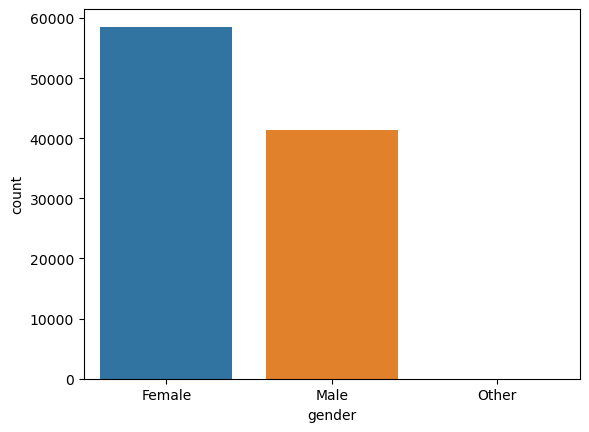

In [103]:
sns.countplot(x=db['gender'])

In [63]:
# There is almost 18% difference between Females and Males. 
# Also there is gender title as Other, I am not removing it because it can be a Transgender data.

<Axes: xlabel='age', ylabel='Count'>

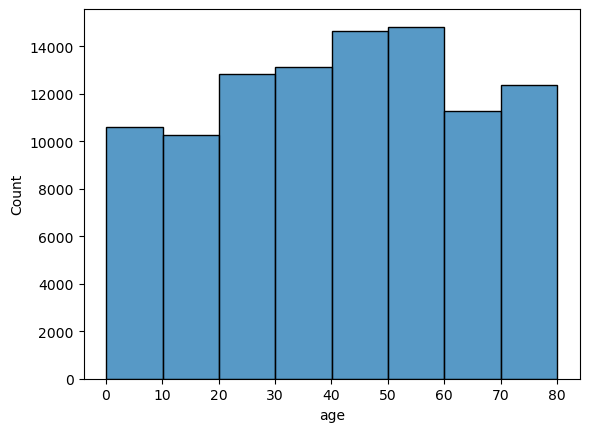

In [104]:
sns.histplot(x=db['age'], bins=8)

In [65]:
# People have age between 40-60 are high and others are evenly distributed.

Text(0.5, 0, 'Hypertension')

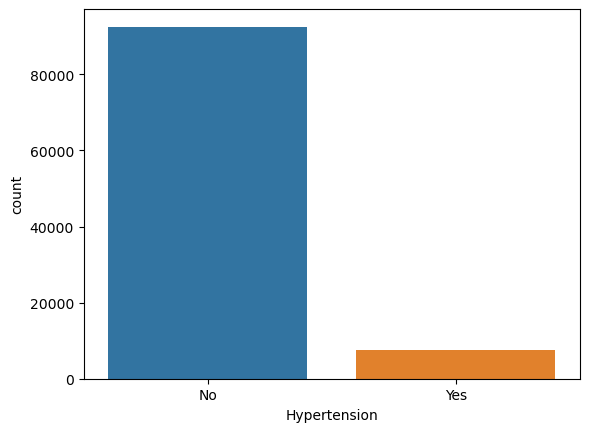

In [105]:
sns.countplot(x=db['hypertension'])
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])
plt.xlabel('Hypertension')

In [67]:
# There are almost 90000 people without Hypertension.

Text(0.5, 0, 'Heart Disease')

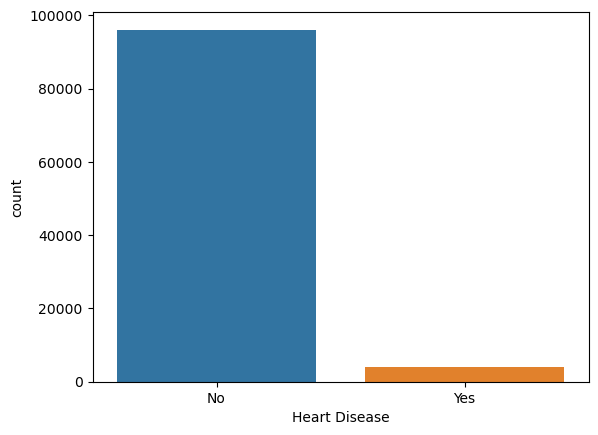

In [106]:
sns.countplot(x=db['heart_disease'])
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])
plt.xlabel('Heart Disease')

In [69]:
# Almost 95000 people don't have any kind of heart disease.

Text(0.5, 0, 'Smoking History')

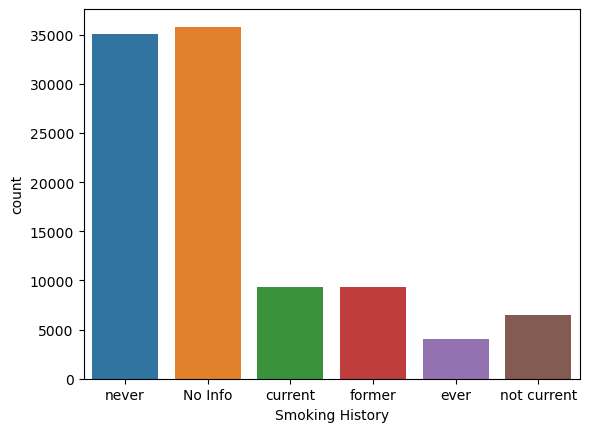

In [107]:
sns.countplot(x=db['smoking_history'])
plt.xlabel('Smoking History')

In [71]:
# There is 'No Info' about almost 36000 people whereas 35000 people have never done smoking.
# currently - 9000
# Former Smokers - 9000
# Ever - 4000
# Not Currently - 7000

Text(0.5, 0, 'BMI')

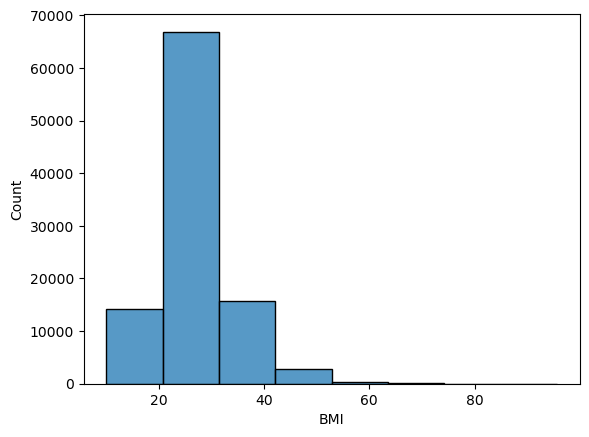

In [108]:
sns.histplot(x=db['bmi'], bins=8)
plt.xlabel('BMI')

In [73]:
# Maximum number of people have BMI of 30.

Text(0.5, 0, 'HbA1c Level')

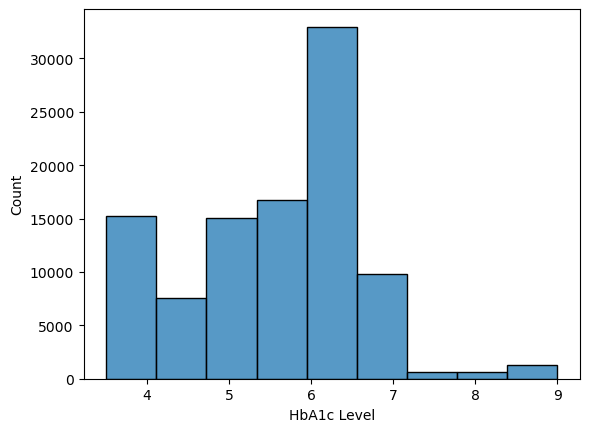

In [109]:
sns.histplot(x=db['HbA1c_level'], bins=9)
plt.xlabel('HbA1c Level')

In [75]:
# Maximum number of people have HbA1c level between 6-6.5.

Text(0.5, 0, 'Blood Glucose Level')

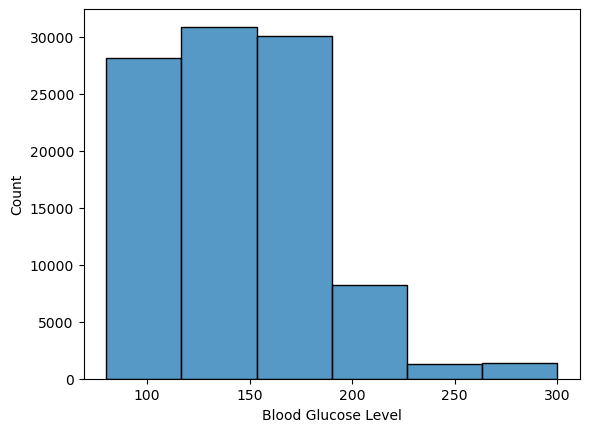

In [110]:
sns.histplot(x=db['blood_glucose_level'], bins=6)
plt.xlabel('Blood Glucose Level')

In [77]:
# Averagely people have 100-200 Blood Glucose Level whereas some have 200-300.

Text(0.5, 0, 'Diabetes')

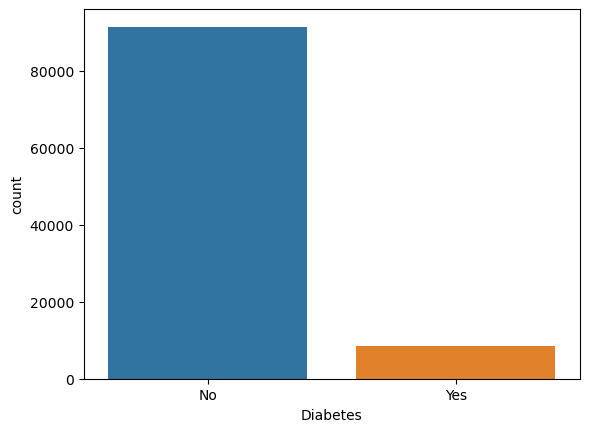

In [111]:
sns.countplot(x=db['diabetes'])
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Diabetes')

In [79]:
# There are almost 90000 people who dont have diabetes

In [80]:
# BIVARIATE ANALYSIS

Text(0.5, 0, 'Diabetes')

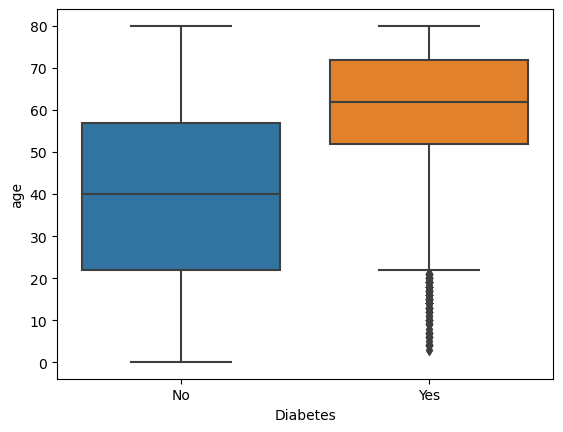

In [112]:
sns.boxplot(x=db['diabetes'], y=df['age'])
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Diabetes')

In [82]:
# Average age of people who have diabetes is 60 and who don't have is 40. 
# This shows as the people age goes above 50 tend to get Diabetes.

<Axes: xlabel='age', ylabel='bmi'>

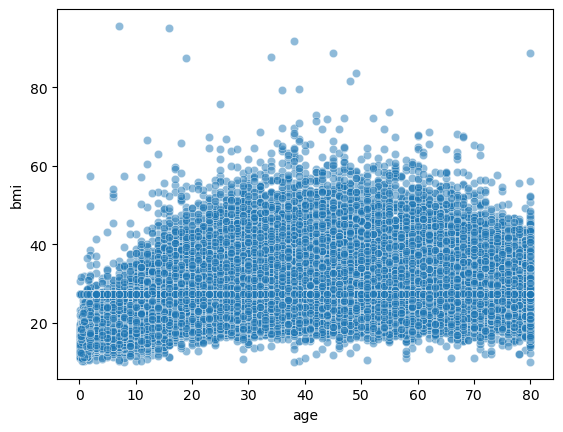

In [113]:
sns.scatterplot(x=db['age'], y=db['bmi'], alpha=0.5)

In [84]:
# Above plot showing a slight connection between age and bmi which is as 
# the age goes till 30-50 bmi grows and after it start decreasing. 
# The increase is high but the decrease is slow.

Text(0.5, 0, 'Hypertension')

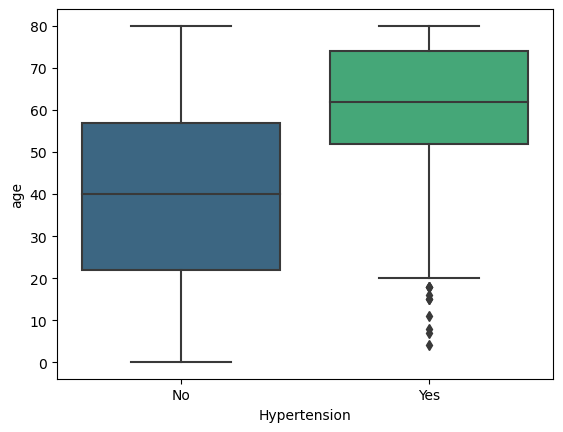

In [114]:
sns.boxplot(x=db['hypertension'], y=db['age'], palette='viridis')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Hypertension')

In [86]:
# Average age of people who have hypertension is 60 and who don't have is 40. 
# This shows as the people age goes above 50 people start having hypertension issue.

<Axes: xlabel='blood_glucose_level', ylabel='age'>

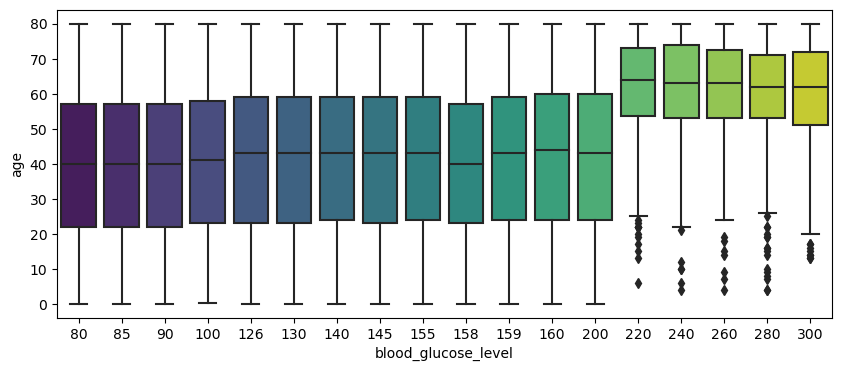

In [115]:
plt.figure(figsize=(10,4))
sns.boxplot(y=db['age'], x=db['blood_glucose_level'], palette='viridis')

In [88]:
# Average glucose level in blood is between 80-200 in the people with age group 20-50. 
# but people with more than 50 years have glucose level from 220-300.

<Axes: xlabel='HbA1c_level', ylabel='age'>

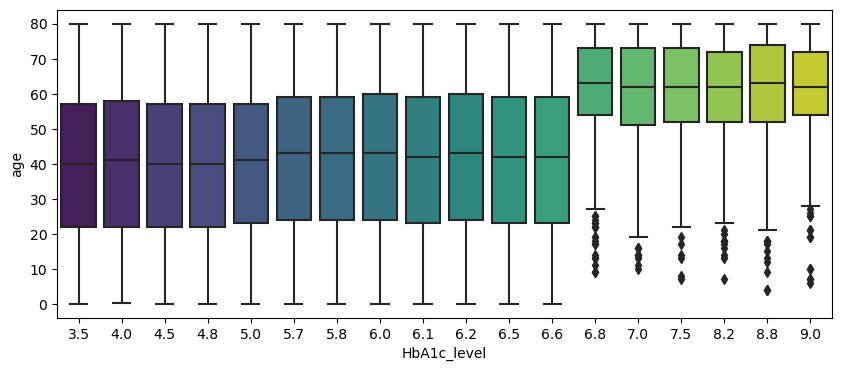

In [116]:
plt.figure(figsize=(10,4))
sns.boxplot(x=db['HbA1c_level'], y=db['age'], palette='viridis')

In [90]:
# The average age of people with HbA1c level 3.5-6.6 is 40, but it rises from 6.8-9.0 in older people whose average age is 60.

In [118]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='smoking_history', ylabel='hypertension'>

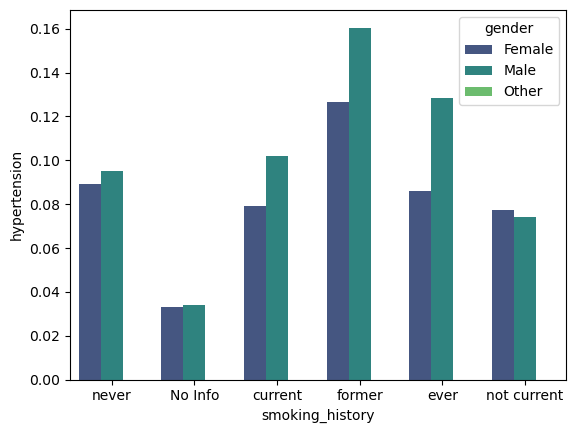

In [119]:
sns.barplot(x=db['smoking_history'], y=db['hypertension'], hue=db['gender'], palette='viridis', ci=None)

In [93]:
# Former Smokers are facing high hypertension in regard of all other peoples who have smoking history. 
# And males have higher hypertension than females.

<Axes: xlabel='smoking_history', ylabel='heart_disease'>

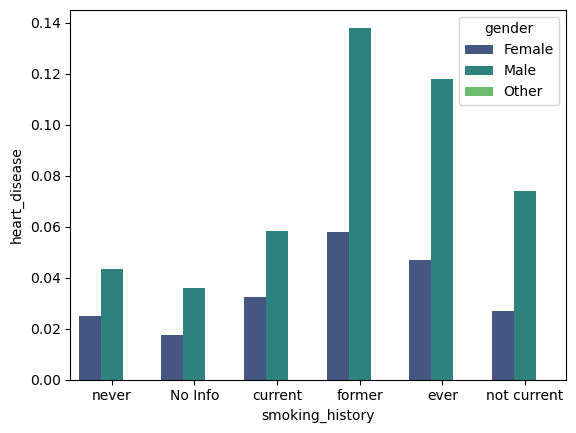

In [120]:
sns.barplot(x=db['smoking_history'], y=db['heart_disease'], hue=db['gender'], palette='viridis', ci=None)

In [95]:
# People who are former and regular smokers have high rate of heart disease 
# and out of those males have very high chance of getting heart disease.

<Axes: xlabel='smoking_history', ylabel='blood_glucose_level'>

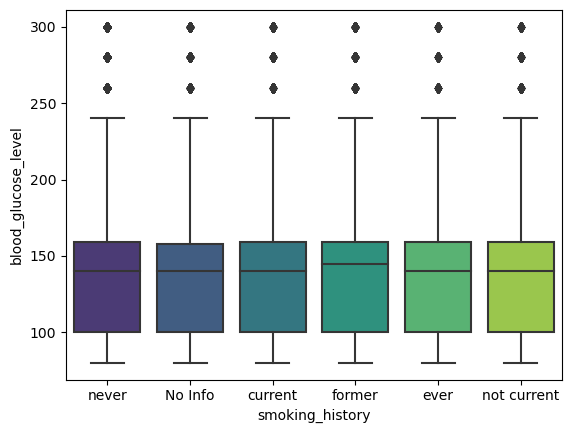

In [121]:
sns.boxplot(x=db['smoking_history'], y=db['blood_glucose_level'], palette='viridis')

In [97]:
# There is not much difference in glucose level of with respect of smoking history.

<Axes: xlabel='smoking_history', ylabel='HbA1c_level'>

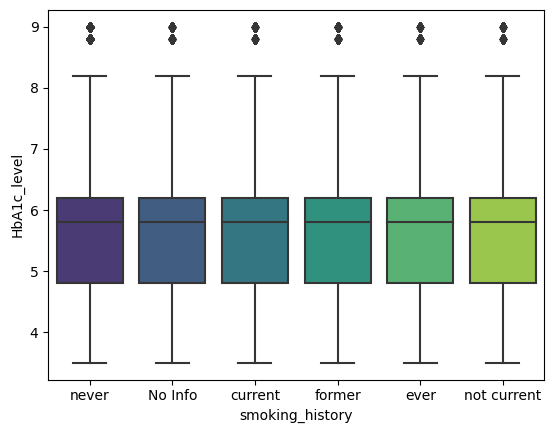

In [122]:
sns.boxplot(x=db['smoking_history'], y=db['HbA1c_level'], palette='viridis')

In [99]:
# Everyone who has smoking history have averagly around 5.8 HbA1c level.

<Axes: xlabel='smoking_history', ylabel='age'>

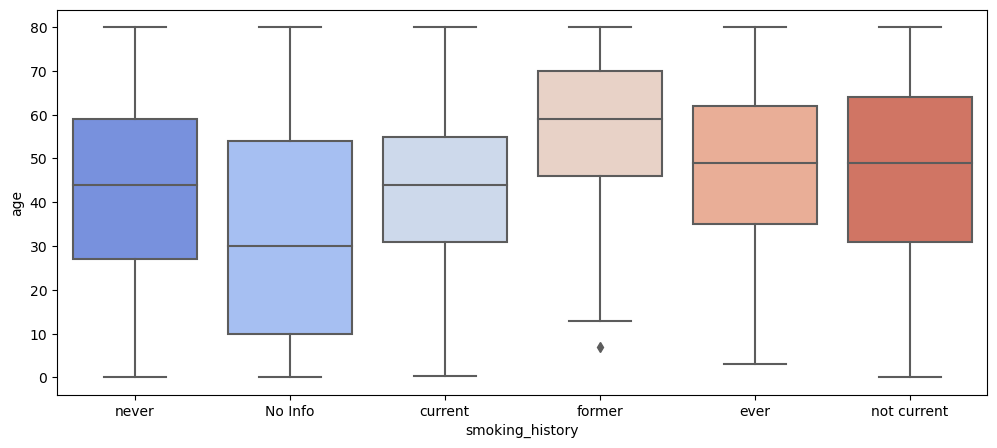

In [123]:
plt.figure(figsize=(12,5))
sns.boxplot(x=db['smoking_history'], y=db['age'], palette='coolwarm')

In [101]:
# Mostly people under age of 30 have never tried smoking. And people after 60 try to leave smoking.

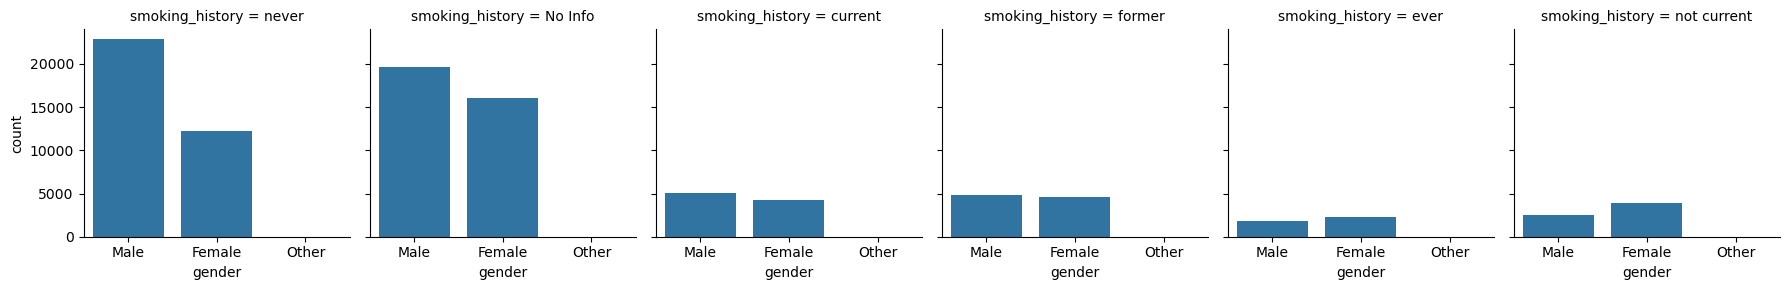

In [124]:
g =sns.FacetGrid(db, col="smoking_history")
g.map(sns.countplot, "gender")

<Axes: >

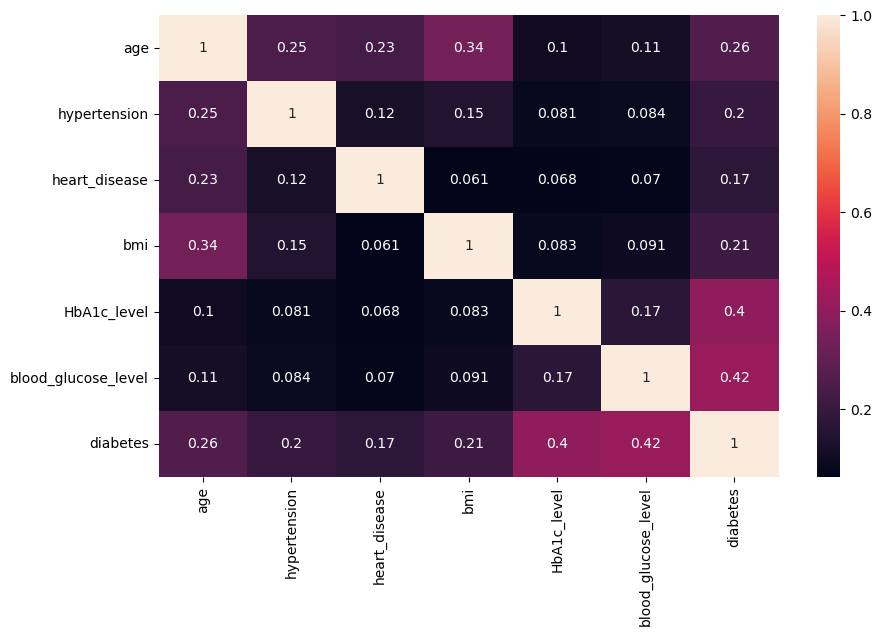

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(db.corr(), annot=True)

In [104]:
#As we can see on the heat map, HbA1c Level and Blood Glucose Level is correlated with having diabetes. 
#This might help us track a pattern of our data distribution. 
#In fact, every other feature is correlated with diabetes, but the correlation level is not high like the mentioned features.

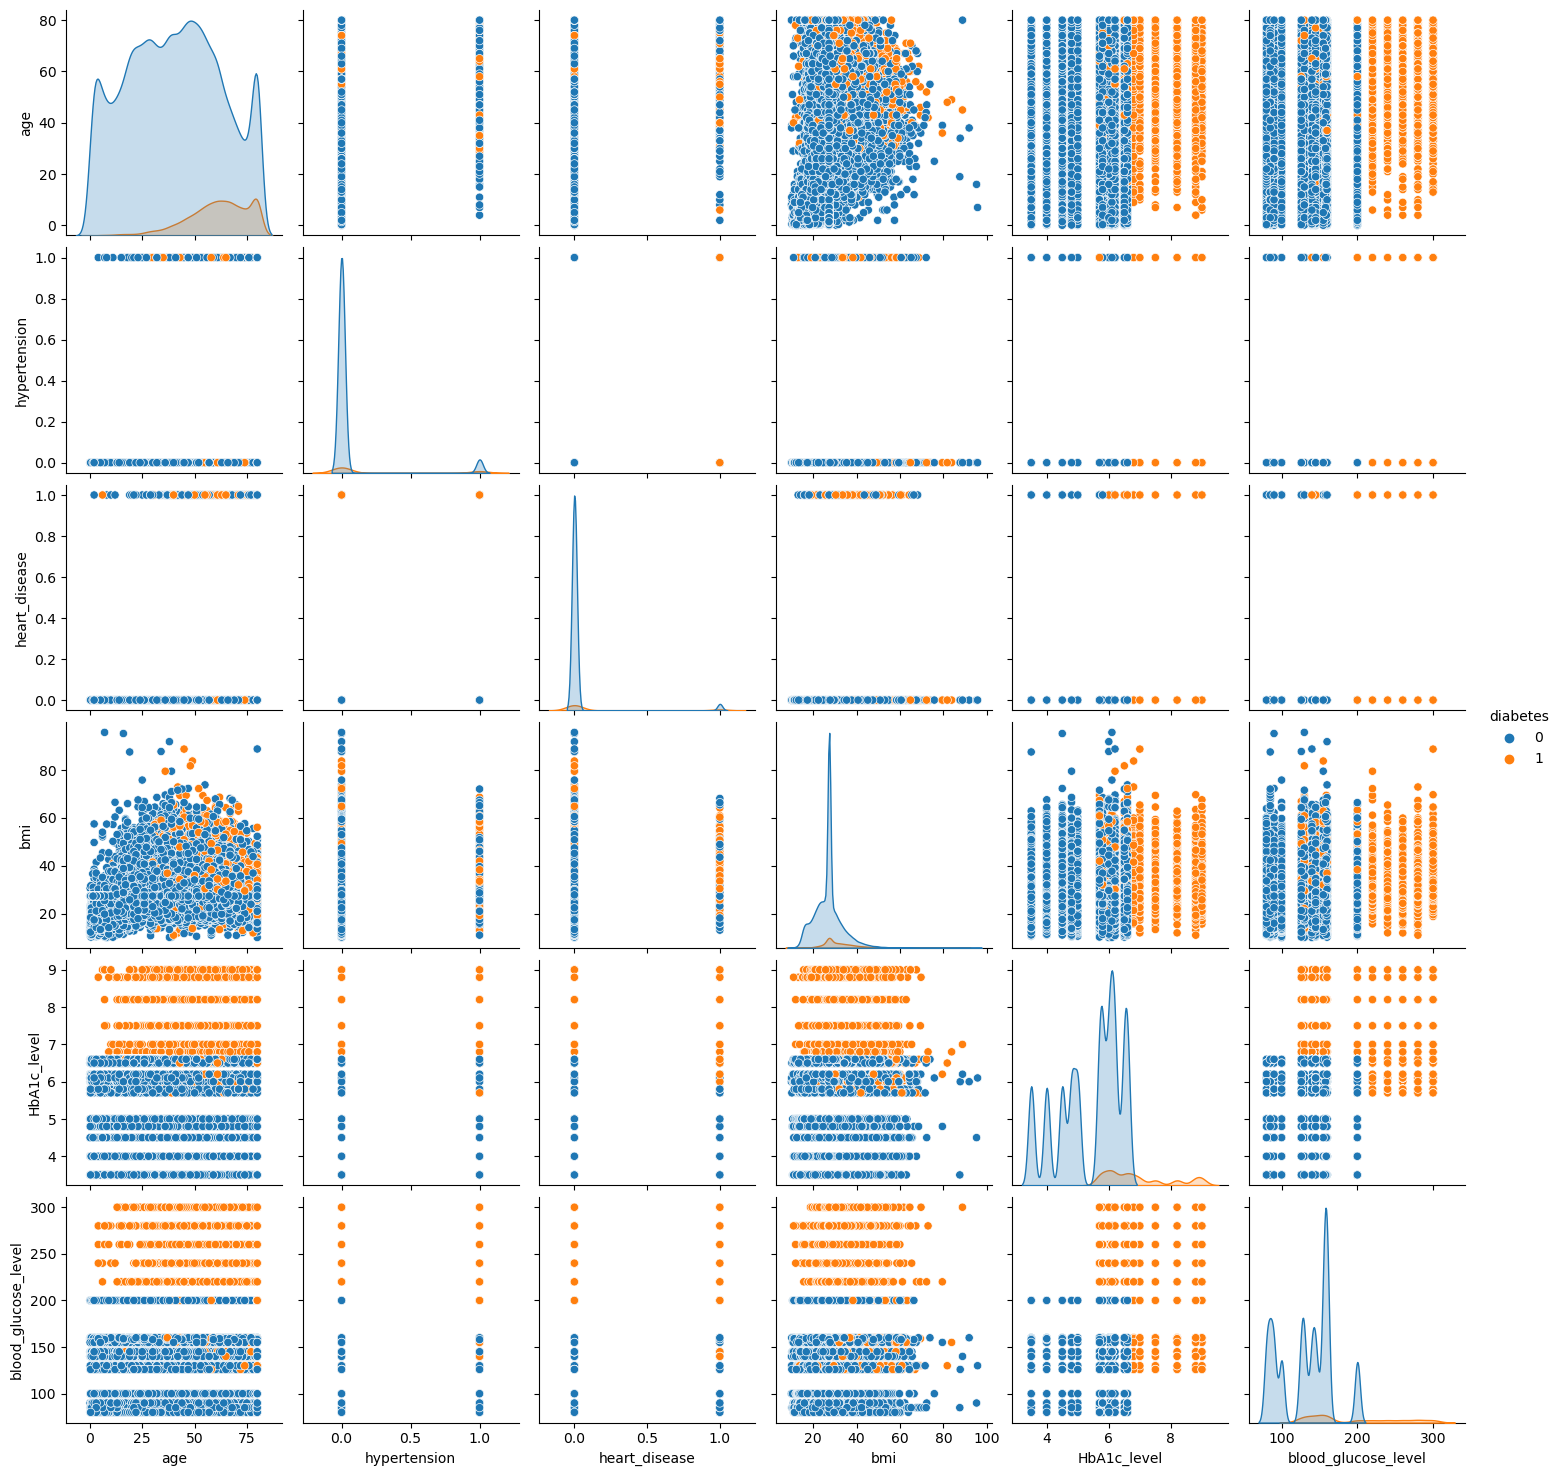

In [126]:
#Pair plot to see all the distribution.
sns.pairplot(db, hue = "diabetes")
plt.show()

In [ ]:
#Now we have a better sight on distribution of our data. 
#Blood Glucose Level and Hb1Ac Level is really an indicator of diabetes as seen above.

# MODEL BUILDING

# LOGISTIC REGRESSION

In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

db['gender'] = le.fit_transform(db['gender'])
db['smoking_history'] = le.fit_transform(db['smoking_history'])

db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [178]:
from sklearn.model_selection import train_test_split

In [179]:
train_db , test_db = train_test_split(db, test_size = .2)

In [180]:
db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [181]:
train_db_x = train_db.iloc[:  , 0: -1] # all x
train_db_y = train_db.iloc[:, -1] # only y

test_db_x = test_db.iloc[:  , 0: -1] # all x from test
test_db_y = test_db.iloc[:, -1]

In [182]:
test_db_x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
32057,1,44.0,1,0,0,28.86,4.8,80
47084,1,30.0,0,0,0,17.48,4.5,159
60359,1,73.0,1,0,3,28.55,6.2,140
16389,1,61.0,0,0,5,28.73,3.5,200
44466,1,15.0,0,0,0,21.48,4.0,200


In [183]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [184]:
logreg.fit(train_db_x,train_db_y)

LogisticRegression()

In [185]:
pred_test = logreg.predict(test_db_x)

In [186]:
from sklearn.metrics import confusion_matrix

In [187]:
confusion_matrix(test_db_y, pred_test)

array([[18050,   184],
       [  689,  1077]], dtype=int64)

In [188]:
pred_test =logreg.predict(test_db_x)

In [189]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(test_db_y, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18234
           1       0.85      0.61      0.71      1766

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.84     20000
weighted avg       0.95      0.96      0.95     20000



# DECISION TREE

In [191]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

db['gender'] = le.fit_transform(db['gender'])
db['smoking_history'] = le.fit_transform(db['smoking_history'])

db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [192]:
from sklearn.model_selection import train_test_split# split into train & test 

train_db,test_db = train_test_split(db, test_size =.2)

train_db_x = train_db.iloc[: ,  0:-1]# all x from test
train_db_y = train_db.iloc[: ,  -1]# only y

test_db_x = test_db.iloc[: ,  0:-1] # all x from test
test_db_y = test_db.iloc[: ,  -1] 

In [193]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(train_db_x,train_db_y)

DecisionTreeClassifier(class_weight='balanced')

In [194]:
predict_test_dt =dt.predict(test_db_x)
predict_test_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
from sklearn.metrics import confusion_matrix ,accuracy_score, recall_score , precision_score ,f1_score,classification_report

confusion_matrix(test_db_y,predict_test_dt)

array([[17833,   418],
       [  462,  1287]], dtype=int64)

In [196]:
print(classification_report(test_db_y,predict_test_dt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     18251
           1       0.75      0.74      0.75      1749

    accuracy                           0.96     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.96      0.96      0.96     20000



# RANDOM FOREST

In [197]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

db['gender'] = le.fit_transform(db['gender'])
db['smoking_history'] = le.fit_transform(db['smoking_history'])

db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [198]:
from sklearn.model_selection import train_test_split
train_db,test_db=train_test_split(db,test_size=.25, random_state=11)

In [199]:
train_db_x=train_db.iloc[:,0:-1]
train_db_y=train_db.iloc[:,-1]

test_db_x=test_db.iloc[:,0:-1]
test_db_y=test_db.iloc[:,-1]

In [200]:
train_db_x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
93007,1,12.0,0,0,0,26.31,5.8,80
22649,0,5.0,0,0,0,27.32,6.5,90
75866,0,55.0,0,0,2,32.87,4.8,130
50605,1,12.0,0,0,4,19.15,4.0,126
67420,0,3.0,0,0,0,16.96,3.5,90


In [201]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_db_x,train_db_y)

RandomForestClassifier()

In [202]:
pred_test_rfc = rfc.predict(test_db_x)

In [203]:
from sklearn.metrics import confusion_matrix

In [204]:
tab_rfc = confusion_matrix(test_db_y, pred_test_rfc)
tab_rfc

array([[22807,    85],
       [  669,  1439]], dtype=int64)

In [205]:
print(classification_report(test_db_y, pred_test_rfc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22892
           1       0.94      0.68      0.79      2108

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



# K-Nearest Neighbors (KNN)

In [206]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

db['gender'] = le.fit_transform(db['gender'])
db['smoking_history'] = le.fit_transform(db['smoking_history'])

db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [207]:
from sklearn.model_selection import train_test_split
train_db,test_db= train_test_split(db, test_size=.2)

In [208]:
train_db_x= train_db.iloc[:,0:-1]
train_db_y= train_db.iloc[:,-1]

test_db_x= test_db.iloc[:,0:-1]
test_db_y =test_db.iloc[:,-1]

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [210]:
knn.fit(train_db_x,train_db_y)

KNeighborsClassifier()

In [211]:
pred_knn=knn.predict(test_db_x)

In [212]:
confusion_matrix(test_db_y,pred_knn)

array([[18244,   125],
       [  769,   862]], dtype=int64)

In [213]:
print(classification_report(test_db_y,pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18369
           1       0.87      0.53      0.66      1631

    accuracy                           0.96     20000
   macro avg       0.92      0.76      0.82     20000
weighted avg       0.95      0.96      0.95     20000



# SUPPORRT VECTOR MACHINE

In [214]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

db['gender'] = le.fit_transform(db['gender'])
db['smoking_history'] = le.fit_transform(db['smoking_history'])

db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [215]:
from sklearn.model_selection import train_test_split
train_db,test_db= train_test_split(db, test_size=.2)

In [216]:
train_db_x= train_db.iloc[:,0:-1]
train_db_y= train_db.iloc[:,-1]

test_db_x= test_db.iloc[:,0:-1]
test_db_y =test_db.iloc[:,-1]

In [217]:
from sklearn.svm import SVC

In [218]:
svc_db = SVC()
# different kernels in svm

In [219]:
svc_db.fit(train_db_x, train_db_y)

SVC()

In [220]:
pred_svc = svc_db.predict(test_db_x)

In [221]:
from sklearn.metrics import confusion_matrix , classification_report

In [222]:
confusion_matrix(test_db_y, pred_svc)

array([[18288,     0],
       [ 1047,   665]], dtype=int64)

In [223]:
print(classification_report(test_db_y, pred_svc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18288
           1       1.00      0.39      0.56      1712

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.77     20000
weighted avg       0.95      0.95      0.94     20000



# GRADIENT BOOSTING

In [224]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

db['gender'] = le.fit_transform(db['gender'])
db['smoking_history'] = le.fit_transform(db['smoking_history'])

db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [225]:
from sklearn.model_selection import train_test_split
train_db,test_db= train_test_split(db, test_size=.2)

In [226]:
train_db_x= train_db.iloc[:,0:-1]
train_db_y= train_db.iloc[:,-1]

test_db_x= test_db.iloc[:,0:-1]
test_db_y =test_db.iloc[:,-1]

In [227]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(train_db_x,train_db_y)

GradientBoostingClassifier()

In [228]:
pred_test_gb = model.predict(test_db_x)

tab_gb = confusion_matrix(test_db_y, pred_test_gb)
tab_gb

array([[18281,    14],
       [  554,  1151]], dtype=int64)

In [229]:
print(classification_report(test_db_y, pred_test_gb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18295
           1       0.99      0.68      0.80      1705

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# LOGISTIC REGRESSION

In [ ]:
            precision    recall  f1-score   support

           0       0.97      0.98      0.97     18345
           1       0.78      0.61      0.68      1655

    accuracy                           0.95     20000
   macro avg       0.87      0.80      0.83     20000
weighted avg       0.95      0.95      0.95     20000


# DECISION TREE

In [ ]:
             precision    recall  f1-score   support

           0       0.98      0.97      0.97     18349
           1       0.71      0.73      0.72      1651

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

# RANDOM FOREST

In [ ]:
             precision    recall  f1-score   support

           0       0.97      1.00      0.98     22892
           1       0.94      0.68      0.79      2108

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000


# K-NEAREST NEIGHBOURS [KNN]

In [ ]:
             precision    recall  f1-score   support

           0       0.96      0.99      0.97     18304
           1       0.86      0.54      0.66      1696

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.82     20000
weighted avg       0.95      0.95      0.95     20000

# SUPPORT VECTOR MACHINE [SVM]

In [ ]:
             precision    recall  f1-score   support

           0       0.95      1.00      0.97     18350
           1       1.00      0.38      0.55      1650

    accuracy                           0.95     20000
   macro avg       0.97      0.69      0.76     20000
weighted avg       0.95      0.95      0.94     20000


# GRADIENT BOOSTING

In [ ]:
             precision    recall  f1-score   support

           0       0.97      1.00      0.98     18288
           1       0.99      0.68      0.81      1712

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000